# Plot estimated and observed clade frequencies

Plot the overall observed clade frequencies compared to the estimated frequencies at each timepoint. The differences between these frequencies tells us something about the error in frequency estimation due to missing data from the near future.

In [39]:
from collections import defaultdict
import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

plt.style.use("huddlej")

In [2]:
!pwd

/Users/jlhudd/projects/nextstrain/flu-forecasting/analyses


In [18]:
with open("../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/timepoints/2015-10-01/segments/ha/frequencies.json", "r") as fh:
    frequencies = json.load(fh)

In [19]:
with open("../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/timepoints/2015-10-01/segments/ha/clades.json", "r") as fh:
    clades = json.load(fh)

In [20]:
tips = pd.read_csv("../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/standardized_tip_attributes.tsv",
                   sep="\t", parse_dates=["timepoint"])
tips = tips.loc[
    tips["segment"] == "ha",
    ["strain", "clade_membership", "timepoint", "frequency"]
].copy()

In [21]:
data_path = "../results/builds/h3n2/5_viruses_per_month/sample_0/2005-10-01--2015-10-01/tips_to_clades.tsv"

In [22]:
df = pd.read_csv(data_path, sep="\t", parse_dates=["timepoint"])

In [42]:
# successful clade
clade_name = "d4aa5d5"

# unsuccessful clade
#clade_name = "5f0cf16"

In [43]:
clade_tips = df[df["clade_membership"] == clade_name]["tip"].unique()

In [44]:
clade_tips.shape

(88,)

In [45]:
df["tip"].unique().shape

(1600,)

In [46]:
clade_tips.shape

(88,)

In [47]:
estimated_clade_frequencies = tips[tips["strain"].isin(clade_tips)].groupby("timepoint")["frequency"].sum().reset_index()

In [48]:
estimated_clade_frequencies["timepoint_float"] = estimated_clade_frequencies["timepoint"].dt.year + (estimated_clade_frequencies["timepoint"].dt.month - 1) / 12.0

In [49]:
estimated_clade_frequencies

,timepoint,frequency,timepoint_float
0,2011-10-01,0.397633,2011.75
1,2012-04-01,0.521392,2012.25
2,2012-10-01,0.310594,2012.75
3,2013-04-01,0.099375,2013.25
4,2013-10-01,0.006477,2013.75


In [50]:
clade_frequencies = np.zeros_like(frequencies["data"]["pivots"])

In [51]:
for tip in clade_tips:
    clade_frequencies += frequencies["data"]["frequencies"][tip]

In [52]:
clade_frequencies

array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.006855,
       0.405188, 0.507412, 0.290444, 0.092566, 0.006169, 0.      ,
       0.      , 0.      , 0.      ])

Text(0,0.5,'Frequency')

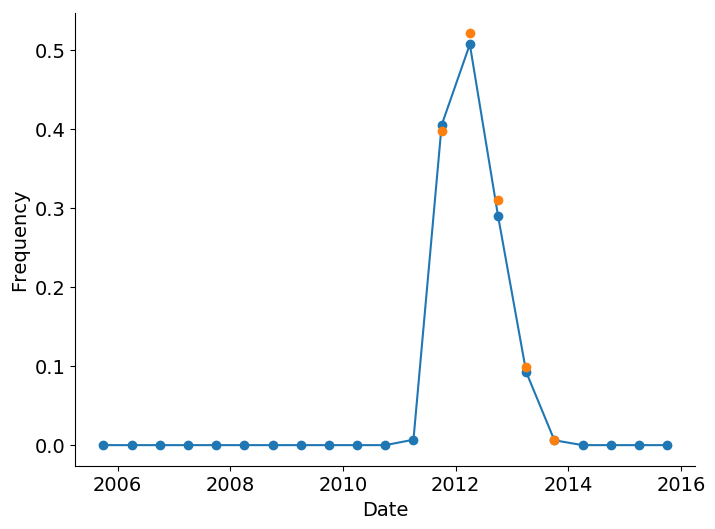

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(frequencies["data"]["pivots"], clade_frequencies, "o-")
ax.plot(estimated_clade_frequencies["timepoint_float"], estimated_clade_frequencies["frequency"], "o")
ax.set_xlabel("Date")
ax.set_ylabel("Frequency")
#ax.set_ylim(0, 1)

In [54]:
tips[tips["strain"].isin(clade_tips)]

,strain,clade_membership,timepoint,frequency
485,A/Bangladesh/5006/2011,d4aa5d5,2011-10-01,0.041487
486,A/Bangladesh/5071/2011,d4aa5d5,2011-10-01,0.040609
492,A/BritishColumbia/RV1382/2011,d4aa5d5,2011-10-01,0.012884
504,A/Hawaii/2/2011,d4aa5d5,2011-10-01,0.017217
508,A/HongKong/3974/2011,d4aa5d5,2011-10-01,0.040841
513,A/India/514/2011,d4aa5d5,2011-10-01,0.043013
514,A/India/KL1110681/2011,d4aa5d5,2011-10-01,0.043009
515,A/India/KL1118169/2011,d4aa5d5,2011-10-01,0.033408
528,A/LaReunion/1523/2011,d4aa5d5,2011-10-01,0.018272
530,A/Lebanon/11L013/2011,d4aa5d5,2011-10-01,0.022392


In [36]:
found_clade_tips = tips[tips["strain"].isin(clade_tips)]["strain"].unique()

In [37]:
set(clade_tips) - set(found_clade_tips)

set()

In [38]:
tips[tips["strain"] == "A/Kenya/230/2012"]

,strain,clade_membership,timepoint,frequency


In [41]:
df[df["clade_membership"] == "5f0cf16"]

,tip,clade_membership,depth,lineage,segment,timepoint
16975,A/Thailand/18/2009,5f0cf16,1,h3n2,ha,2011-04-01
16986,A/Kenya/10/2010,5f0cf16,1,h3n2,ha,2011-04-01
16997,A/Kenya/216/2010,5f0cf16,1,h3n2,ha,2011-04-01
17008,A/Piaui/4751/2011,5f0cf16,1,h3n2,ha,2011-04-01
17019,A/Italy/540/2010,5f0cf16,1,h3n2,ha,2011-04-01
17030,A/Kenya/1632/2010,5f0cf16,1,h3n2,ha,2011-04-01
17041,A/Murcia/RR6923/2010,5f0cf16,1,h3n2,ha,2011-04-01
17052,A/Peru/PER239/2010,5f0cf16,1,h3n2,ha,2011-04-01
17063,A/Peru/PER308/2010,5f0cf16,1,h3n2,ha,2011-04-01
17074,A/Peru/PER089/2010,5f0cf16,1,h3n2,ha,2011-04-01
